The code in this file has the purpose of generating graphs from csv files.
Originallly made for tensorboard. 

In [23]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from utils import parse_file_name

In [24]:
mypath = 'loss_mask'
output_file = 'out'

if not os.path.isdir(mypath):
    raise NameError
    
onlyfiles = [join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f))]

onlyfiles = [file for file in onlyfiles if file.split('.')[-1] == 'csv']

Concat: max value: 0.5600183606147766
ADD: max value: 0.5538907051086426


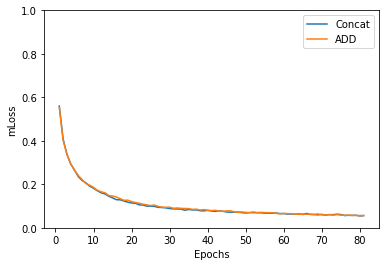

In [26]:
df = pd.DataFrame()
max_values = []
min_values = []
for i,file_name in enumerate(onlyfiles):
    #print(file_name
    names = parse_file_name(file_name)
    df2 = pd.read_csv(file_name)

    if i == 0:
        df.insert(i,'Step',df2['Step'],True)
    
    df.insert(i+1,names['plot_name'],df2['Value'],True)
    
    # Terminal Info
    max_values.append(max(df2['Value']))
    min_values.append(min(df2['Value']))
    value  = max(df2['Value'])
    name = names['plot_name']
    
    print(f'{name}: max value: {value}')


ax = df.plot(x = 'Step')
ax.set_xlabel("Epochs")
ax.set_ylabel(names['metric'])
ax.set_ylim(0,1)

plt.savefig(join(mypath,names['title']) + '.pdf')
plt.savefig(join(mypath,names['title']) + '.png')
